In [1]:
#!pip install fbprophet

In [2]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [3]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [4]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

In [6]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [7]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

## Part 3: NASDAQ

### Historical Data

In [8]:
historical_period = "2013-2015"
prediction_period = "2015-2016"
index = "NASDAQ"

query = '''
select * from NASDAQ
where Date > "2013-06-01" and Date < "2015-07-01"
'''

data = pd.read_sql(query, conn)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
519,2015-06-24,5151,5164,5122,5122,5122,1628800000
520,2015-06-25,5139,5142,5102,5112,5112,1614760000
521,2015-06-26,5113,5121,5061,5081,5081,2147483647
522,2015-06-29,5021,5051,4956,4958,4958,2025580000
523,2015-06-30,5000,5009,4968,4987,4987,2034430000


In [13]:
global_slowdown_NAS_historical = data[['Date', 'Close']]

In [15]:
#global_slowdown_NAS_historical.to_sql(name = "global_slowdown_NAS_historical", if_exists="append", con=conn, index=False)

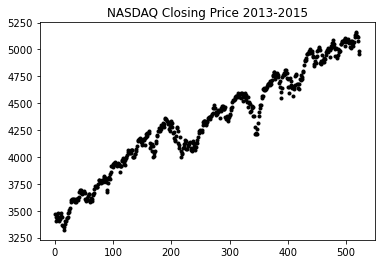

In [16]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

### Predictive Model - Decline and Recovery

In [17]:
data = data[['Date', 'Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
prediction.tail()

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
884,2016-06-25,5839.258609,5110.962654,6417.634148,5169.097678,6504.566523,-71.425210,-71.425210,-71.425210,-121.29989,...,15.162489,15.162489,15.162489,34.712191,34.712191,34.712191,0.0,0.0,0.0,5767.833398
885,2016-06-26,5841.043070,5095.360565,6427.150041,5168.475314,6511.780669,-70.777534,-70.777534,-70.777534,-121.29989,...,15.162484,15.162484,15.162484,35.359873,35.359873,35.359873,0.0,0.0,0.0,5770.265536
886,2016-06-27,5842.827531,5062.277149,6408.690358,5168.604080,6517.366861,-93.258119,-93.258119,-93.258119,-121.29989,...,-8.613399,-8.613399,-8.613399,36.655170,36.655170,36.655170,0.0,0.0,0.0,5749.569411
887,2016-06-28,5844.611991,5077.564738,6429.300094,5168.736158,6521.965412,-90.845026,-90.845026,-90.845026,-121.29989,...,-8.103351,-8.103351,-8.103351,38.558215,38.558215,38.558215,0.0,0.0,0.0,5753.766965
888,2016-06-29,5846.396452,5070.001425,6421.977464,5168.868237,6526.311349,-87.532607,-87.532607,-87.532607,-121.29989,...,-7.245829,-7.245829,-7.245829,41.013112,41.013112,41.013112,0.0,0.0,0.0,5758.863845


In [20]:
global_slowdown_NAS_predict = prediction[['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper']]
global_slowdown_NAS_predict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper
884,2016-06-25,5839.258609,5110.962654,6417.634148,5169.097678,6504.566523
885,2016-06-26,5841.043070,5095.360565,6427.150041,5168.475314,6511.780669
886,2016-06-27,5842.827531,5062.277149,6408.690358,5168.604080,6517.366861
887,2016-06-28,5844.611991,5077.564738,6429.300094,5168.736158,6521.965412
888,2016-06-29,5846.396452,5070.001425,6421.977464,5168.868237,6526.311349


In [22]:
#global_slowdown_NAS_predict.to_sql(name = 'global_slowdown_NAS_predict', if_exists='append', con=conn, index=False)

In [ ]:
figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')